In [5]:
#modules to load saved models
from joblib import dump, load
from tensorflow.keras.models import load_model

#data preprocessing modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from commons import mean_absolute_percentage_error #keep commons.py in notebooks folder

#classification metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

#modules for plots if required
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot 

In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 16.8 MB/s eta 0:00:24
   ---------------------------------------- 2.3/390.3 MB 24.0 MB/s eta 0:00:17
   ---------------------------------------- 3.6/390.3 MB 25.4 MB/s eta 0:00:16
    --------------------------------------- 4.9/390.3 MB 24.2 MB/s eta 0:00:16
    --------------------------------------- 6.8/390.3 MB 28.8 MB/s eta 0:00:14
    --------------------------------------- 8.7/390.3 MB 30.8 MB/s eta 0:00:13
   - -------------------------------------- 10.5/390.3 MB 31.2 MB/s eta 0:00:13
   - -------------------------------------- 12.6/390.3 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 14.5/390.3 MB 40.9 MB/s eta 0:00:10
   - -------------------------------------- 16.4/390.3 MB 40.9 

# Regression

In [7]:
#file path
data=pd.read_csv('datasets/reg_thirty.csv',sep=',')

# 'datasets/reg_interval1.csv'
# 'datasets/reg_interval2.csv'
# 'datasets/reg_interval3.csv'
# 'datasets/reg_seven.csv'
# 'datasets/reg_thirty.csv'
# 'datasets/reg_ninety.csv'

In [9]:
#visualize the data
data.head(3)

,activeaddresses,difficulty,difficulty30mom,difficulty30rsi,difficulty90mom,hashrate90var,median_transaction_fee30trxUSD,median_transaction_feeUSD,mining_profitability,mining_profitability90rsi,...,price30wmaUSD,price3emaUSD,price3wmaUSD,price7smaUSD,price90wmaUSD,sentinusd90emaUSD,sentinusd90smaUSD,size90trx,transactionvalueUSD,priceUSD
0,75756,6695826.0,2327950.0,97.889,3716190.0,1.292548e+26,2.482,0.0474,7220.0,54.763,...,66.298,90.961,91.616,84.929,43.032,68391477,54550954,0.334,2592.0,124.662
1,91875,6695826.0,2327950.0,97.889,3716190.0,1.382186e+26,2.534,0.0539,7990.0,55.757,...,69.605,99.355,100.288,90.078,44.686,73007549,57359476,0.331,4400.0,111.049
2,107142,6695826.0,2327950.0,97.889,3716190.0,1.460025e+26,2.599,0.0600,8852.0,56.831,...,73.541,109.679,111.703,95.902,46.586,77645623,60260338,0.329,4478.0,102.694


In [11]:
#create train-test splits for ANN
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['minmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [13]:
#load saved model
ANN=load_model('trained_models/ANN_reg_thirty.h5',compile=False)

# 'trained_models/ANN_reg_interval1.h5'
# 'trained_models/ANN_reg_interval2.h5'
# 'trained_models/ANN_reg_interval3.h5'
# 'trained_models/ANN_reg_seven.h5'
# 'trained_models/ANN_reg_thirty.h5'
# 'trained_models/ANN_reg_ninety.h5'

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'trained_models/ANN_reg_thirty.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
ANN.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0,
      'stddev': 0.05,
      'seed': None,
      'dtype': 'float32'}},
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None,
      'dtype': '

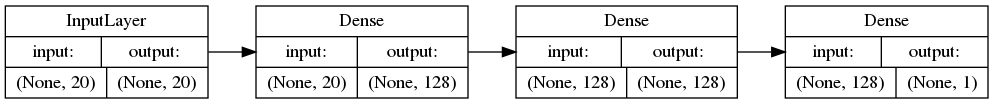

In [7]:
plot_model(ANN, show_layer_names=False, show_shapes=True, rankdir='LR')

In [8]:
#make predictions
y_pred=ANN.predict(X_test)

In [9]:
y_pred=y_pred.ravel() #remove [] from y_pred

In [10]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,583.850,522.711670
1,615.988,534.236450
2,234.619,239.523254
3,5260.000,5060.484375
4,252.788,233.457977
5,379.647,375.422241
6,644.487,616.264648
7,7260.000,7679.484375
8,312.724,311.261230
9,3780.000,3556.501953


In [11]:
#calculate metrics
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=abs(r2_score(y_test, y_pred))

In [12]:
#show metrics in tabular format
metrics=[mae,mape,rmse,r2]
metrics_labels=['MAE','MAPE','RMSE','R^2']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,MAE,90.120525
1,MAPE,4.834167
2,RMSE,175.594730
3,R^2,0.997019


# Classification

In [26]:
#file path
data=pd.read_csv('datasets/cls_seven.csv',sep=',')

# 'datasets/cls_interval1.csv'
# 'datasets/cls_interval2.csv'
# 'datasets/cls_interval3.csv'
# 'datasets/cls_seven.csv'
# 'datasets/cls_thirty.csv'
# 'datasets/cls_ninety.csv'

In [27]:
#visualize the data
data.head(3)

,activeaddresses,confirmationtime,difficulty,difficulty30ema,difficulty3trx,difficulty7mom,difficulty7trx,difficulty90var,fee_to_reward90trxUSD,fee_to_rewardUSD,...,price90momUSD,price90rocUSD,top100cap,top100cap30mom,top100cap30roc,top100cap30rsi,top100cap90rsi,transactions,transactionvalueUSD,category
0,75756,7.273,6695826.0,5385392.0,0.845,0.0,2.593,1.168546e+12,0.742,0.867,...,81.308,606.456,19.962,0.694,3.600,65.405,50.301,52572,2592.0,1
1,91875,7.956,6695826.0,5469936.0,0.520,0.0,2.333,1.243755e+12,0.733,1.338,...,94.548,716.218,20.024,0.677,3.498,66.711,50.893,63095,4400.0,1
2,107142,8.229,6695826.0,5549026.0,0.314,0.0,2.064,1.315554e+12,0.725,1.596,...,106.790,808.284,19.987,0.592,3.051,65.191,50.530,63766,4478.0,1


In [28]:
#create train-test splits for SVM
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['minmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [29]:
#load saved model
ANN=load_model('trained_models/ANN_cls_seven.hdf5',compile=False)

# 'trained_models/ANN_cls_interval1.hdf5'
# 'trained_models/ANN_cls_interval2.hdf5'
# 'trained_models/ANN_cls_interval3.hdf5'
# 'trained_models/ANN_cls_seven.hdf5'
# 'trained_models/ANN_cls_thirty.hdf5'
# 'trained_models/ANN_cls_ninety.hdf5'

In [30]:
ANN.get_config()

{'name': 'sequential_14',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_41',
    'trainable': True,
    'batch_input_shape': (None, 40),
    'dtype': 'float32',
    'units': 200,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0,
      'stddev': 0.05,
      'seed': None,
      'dtype': 'float32'}},
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_42',
    'trainable': True,
    'dtype': 'float32',
    'units': 200,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None,
      'dtype'

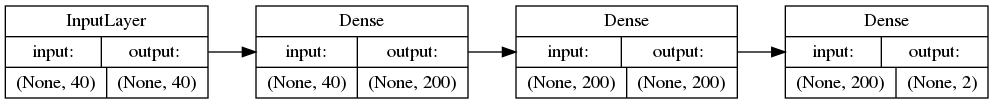

In [31]:
plot_model(ANN, show_layer_names=False, show_shapes=True, rankdir='LR')

In [32]:
#make predictions
y_pred=ANN.predict_classes(X_test)

In [33]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [34]:
#calculate metrics
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='binary') # try average='binary' or 'weighted' take higher
auc=roc_auc_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [35]:
#show metrics in tabular format
metrics=[accuracy, f1, auc, recall, precision]
metrics_labels=['Accuracy','F1-score','AUC','Recall','Precision']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,Accuracy,0.512146
1,F1-score,0.651230
2,AUC,0.532777
3,Recall,0.957447
4,Precision,0.493421
